In [7]:
"""
Extracting all the addresss of Train data from its directive
"""
import glob
# all the tain data paths are stored in the address varibale
address = glob.glob('D:/AML/DevanagariHandwrittenCharacterDataset/Train/*/*.png')

In [8]:
label = []  #declaring empty list for storing labels-Train
import re    
for i in range(len(address)):
    number = re.findall('_+\d+', address[i]) # with radix extrating labels from address
    label.append(int(number[0][1:3])) # storing labels
    #number1 = re.findall('_+\d+', addre)

In [9]:
"""
Extracting all the addresss of Test data from its directive
"""
import glob
# all the test data paths are stored in the address_test varibale
address_test = glob.glob('D:/AML/DevanagariHandwrittenCharacterDataset/Test/*/*.png')

In [10]:
label_test = [] #declaring empty list for storing labels-Test
import re
for i in range(len(address_test)):
    number = re.findall('_+\d+', address_test[i])  # with radix extrating labels from address
    label_test.append(int(number[0][1:3])) # storing labels

In [19]:
len(address_test)

13800

In [12]:
"""
Importing image processing lib
"""
import cv2


In [5]:
image = cv2.imread(a) # testing cv2 working

In [13]:
image.shape

(32, 32, 3)

In [14]:
"""
Importing h5py lib for storing images in hdf5 file format
"""
import h5py 


In [24]:
"""
Storing the Train data into dataset.hdf5 file
"""
hdf5_path = 'D:/AML/dataset.hdf5' # declaring path to store hdf5-file of test images
with h5py.File(hdf5_path, 'w') as hdf5_file: # setting h5py in write mode to above path
    for i in range(len(address)):
        ad = address[i]                # assign address of train data to ad
        image = cv2.imread(ad)          # reading the in the address
        image = cv2.resize(image, (32, 32), interpolation=cv2.INTER_CUBIC) # resizing the image
        X_train = hdf5_file.create_dataset(         # Writing the img into hdf5 file with gzip compression
                name='X_train'+str(i),
                data=image,                           # data type that need to write
                shape=(32, 32, 3),                    # shape of img
                maxshape=(32, 32, 3),              
                compression="gzip",                 #compression type
                compression_opts=9)         
        y_train = hdf5_file.create_dataset(          #Writing the respective label of img 
                name='y_train'+str(i),
                data = label[i],
                shape =(1,),
                maxshape=(None,),
                compression="gzip",
                compression_opts=9)

In [16]:
"""
Similarly store the Test data into datasettest.hdf5 file
"""
hdf5_path = 'D:/AML/datasettest.hdf5'
with h5py.File(hdf5_path, 'w') as hdf5_file:
    for i in range(len(address_test)):
        ad = address_test[i]
        image = cv2.imread(ad)
        image = cv2.resize(image, (32, 32), interpolation=cv2.INTER_CUBIC)
        X_train = hdf5_file.create_dataset(
                name='X_train'+str(i),
                data=image,
                shape=(32, 32, 3),
                maxshape=(32, 32, 3),
                compression="gzip",
                compression_opts=9)
        y_train = hdf5_file.create_dataset(
                name='y_train'+str(i),
                data = label_test[i],
                shape =(1,),
                maxshape=(None,),
                compression="gzip",
                compression_opts=9)

In [17]:
import matplotlib.pyplot as plt
import matplotlib.pylab as plb

In [22]:
%matplotlib 
with h5py.File(hdf5_path, 'r') as hdf5_file:
    fu = plb.imshow(hdf5_file["X_train1000"])
    print(hdf5_file["y_train1000"].value)

Using matplotlib backend: Qt5Agg
[13]


In [1]:
import h5py
import numpy as np
x_train = np.ndarray(shape=(78200,32,32,3))
y_train = np.ndarray(shape=(78200,1))
with h5py.File('D:/AML/dataset.hdf5', 'r') as hdf5_file:
    for i in range(0,78200):
        X_Train = hdf5_file['X_train'+str(i)]
        x_train[i] = X_Train[:]
        y_labels = hdf5_file['y_train'+str(i)]
        y_train[i] = y_labels[:]

In [2]:
import h5py
import numpy as np
x_test = np.ndarray(shape=(13800,32,32,3))
y_test = np.ndarray(shape=(13800,1))
with h5py.File('D:/AML/datasettest.hdf5', 'r') as hdf5_file:
    for i in range(0,13800):
        X_Train = hdf5_file['X_train'+str(i)]
        x_test[i] = X_Train[:]
        y_labels = hdf5_file['y_train'+str(i)]
        y_test[i] = y_labels[:]

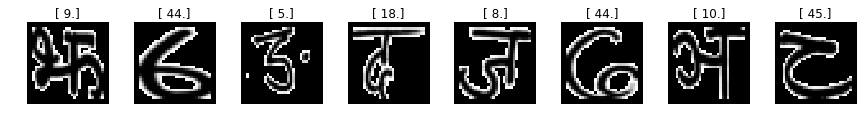

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
cols = 8
rows = 1
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, 13800)
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_test[random_index])
        ax.set_title(y_test[random_index])
plt.show()

In [6]:
y_test.shape

(13800, 1)